<a href="https://colab.research.google.com/github/mafer-saes01/Proyecto_ASE/blob/main/ProyectoASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROYECTO ASE- Análisis de Desapariciones de Mujeres en Jalisco** 

In [1]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import io
import pandas as pd
import numpy as np
import seaborn as sns #Para hacer gráficas
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [3]:
from google.colab import files
uploaded=files.upload()

Saving RNPEDFC.csv to RNPEDFC.csv


In [4]:
desapariciones_df=pd.read_csv(io.BytesIO(uploaded["RNPEDFC.csv"]), index_col=0, encoding='latin-1')
desapariciones_df

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
1,18/03/2012,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NO ESPECIFICADO,NINGUNO,FGE - SONORA
2,05/02/2007,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
3,14/03/2009,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
4,23/12/2006,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
5,11/01/2008,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGJ - ESTADO DE MEXICO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36261,26/04/2018,08:00:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.6,DELGADA,HOMBRE,22,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36262,08/01/2018,11:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.7,ROBUSTA,MUJER,27,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NO ESPECIFICADO,NINGUNO,PGJ - COLIMA
36263,02/02/2015,07:00:00,MEXICO,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86,NO ESPECIFICADO,NO ESPECIFICADO,NINGUNO,FGE - PUEBLA
36264,22/08/2017,04:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NO ESPECIFICADO,NINGUNO,PGJ - COLIMA


# Contexto 

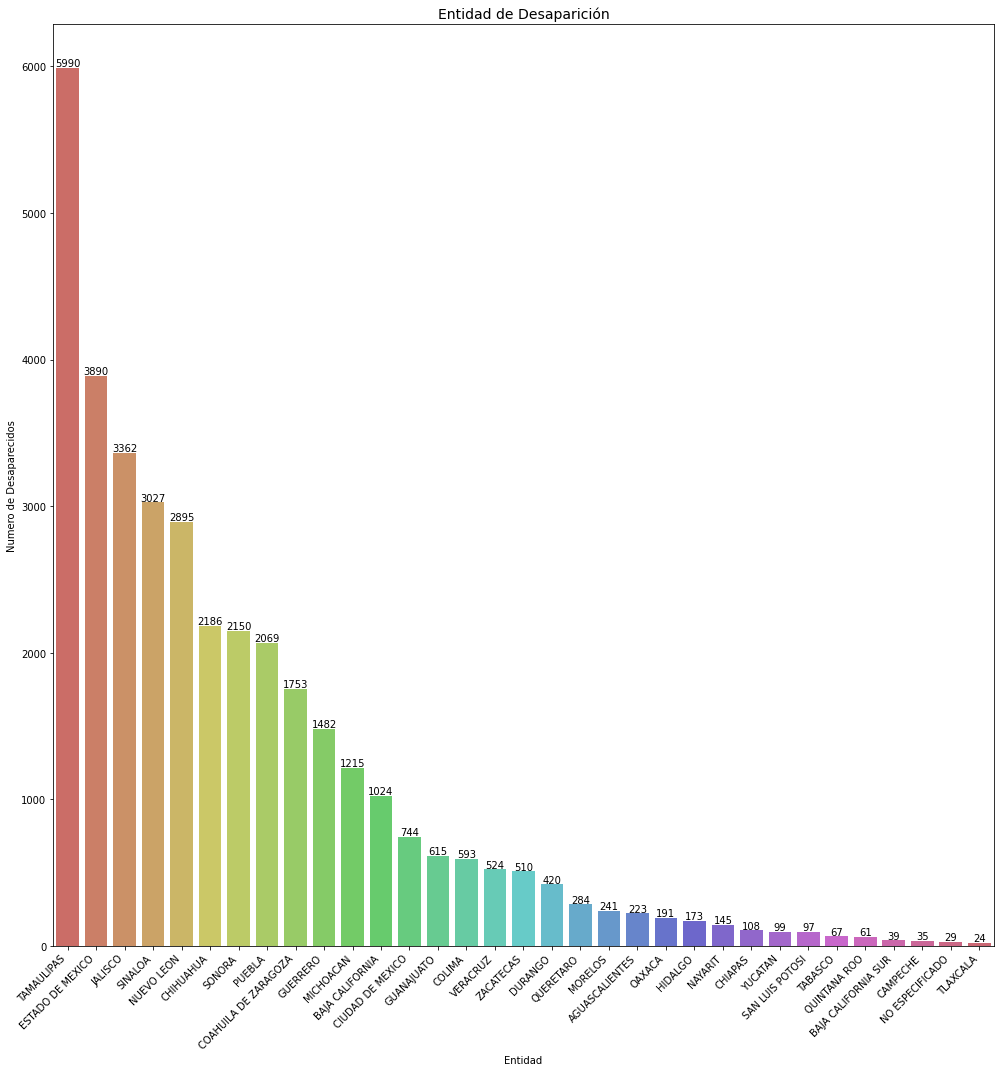

In [5]:
plt.figure(figsize=(14, 15))
ax = sns.countplot( x = 'Entidad', data = desapariciones_df, palette = "hls", order = desapariciones_df['Entidad'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Entidad de Desaparición',fontsize= 14)
plt.ylabel('Numero de Desaparecidos')

# calculate passengers for each category
labels = (desapariciones_df['Entidad'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

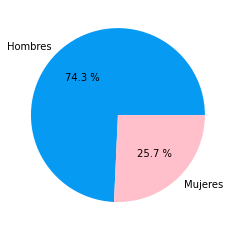

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [6]:
mylabels = ["Hombres", "Mujeres"]
colors = ['#069af3','#ffc0cb']
plt.pie(desapariciones_df["Sexo"].value_counts(), labels=mylabels ,colors=colors,autopct='%0.1f %%')
plt.show() 
plt.figure(figsize=(14,10))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


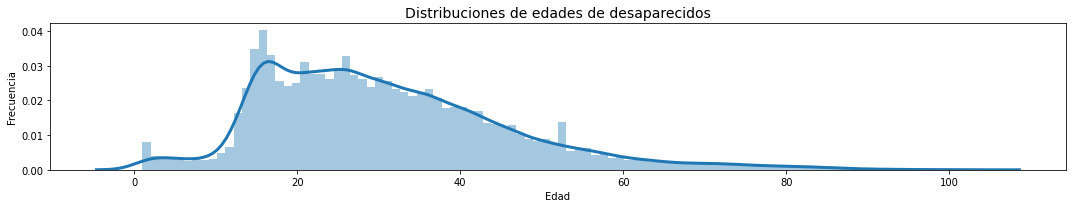

In [7]:
desapariciones_df.loc[desapariciones_df["Edad"] == "NO ESPECIFICADO", "Edad"] = np.nan
desapariciones_df["Edad"] = desapariciones_df["Edad"].astype(float)
#Cuántos hay de cada edad a partir de los 0 años
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(desapariciones_df[(desapariciones_df["Edad"] > 0)].Edad, kde_kws={"lw": 3}, bins = 100)

# set titles and labels
plt.title('Distribuciones de edades de desaparecidos',fontsize= 14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

In [8]:
age_distr=pd.DataFrame(desapariciones_df["Edad"].describe())
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,33109.0,30.801655,15.025777,1.0,20.0,28.0,39.0,103.0


In [9]:
desapariciones_df[desapariciones_df["Edad"] >= 100]

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion
36167,12/12/1997,06:00:00,MEXICO,NUEVO LEON,MONTERREY,MONTERREY,MEXICANA,1.68,MEDIANA,HOMBRE,103.0,"USABA BIGOTE, SIN BARBA,OREJAS GRANDES LOBULO ...",NO ESPECIFICADO,NINGUNO,PGJ - NUEVO LEON


# Limpieza del conjunto de datos

## Se convierte el string "NO ESPECIFICADO" en valores nulos para poder mejorar el uso de la base de datos

In [10]:
desapariciones_df.loc[desapariciones_df["Etnia"] == "NO ESPECIFICADO", "Etnia"] = np.nan
desapariciones_df.loc[desapariciones_df["Edad"] == "NO ESPECIFICADO", "Edad"] = np.nan
desapariciones_df.loc[desapariciones_df["Fecha"] == "NO ESPECIFICADO", "Fecha"] = np.nan
desapariciones_df.loc[desapariciones_df["Hora"] == "NO ESPECIFICADO", "Hora"] = np.nan
desapariciones_df.loc[desapariciones_df["Entidad"] == "NO ESPECIFICADO", "Entidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Municipio"] == "NO ESPECIFICADO", "Municipio"] = np.nan
desapariciones_df.loc[desapariciones_df["Localidad"] == "NO ESPECIFICADO", "Localidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Nacionalidad"] == "NO ESPECIFICADO", "Nacionalidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Estatura"] == "NO ESPECIFICADO", "Estatura"] = np.nan
desapariciones_df.loc[desapariciones_df["Estatura"] == "no ESPECIFICADO", "Estatura"] = np.nan
desapariciones_df.loc[desapariciones_df["Complexion"] == "NO ESPECIFICADO", "Complexion"] = np.nan
desapariciones_df.loc[desapariciones_df["Sexo"] == "NO ESPECIFICADO", "Sexo"] = np.nan
desapariciones_df.loc[desapariciones_df["Descripcion de senas particulares"] == "NO ESPECIFICADO", "Descripcion de senas particulares"] = np.nan
desapariciones_df.loc[desapariciones_df["Discapacidad"] == "NO ESPECIFICADO", "Discapacidad"] = np.nan
desapariciones_df.loc[desapariciones_df["Dependencia que envio la informacion"] == "NO ESPECIFICADO", "Dependencia que envio la informacion"] = np.nan

## Se realiza una columna de fecha y hora con el formato DateTime

In [11]:
desapariciones_df["Fecha_hora"] = pd.to_datetime(desapariciones_df['Fecha']+" "+desapariciones_df['Hora'], infer_datetime_format=True)
desapariciones_df

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,Fecha_hora
1,18/03/2012,05:00:00,MEXICO,SONORA,NAVOJOA,NAVOJOA,MEXICANA,1.1,DELGADA,MUJER,7.0,TIENE UNA CICATRIZ EN LA RODILLA IZQUIERDA POR...,NaN,NINGUNO,FGE - SONORA,2012-03-18 05:00:00
2,05/02/2007,02:00:26,MEXICO,ESTADO DE MEXICO,VALLE DE BRAVO,VALLE DE BRAVO,MEXICANA,1.1,DELGADA,MUJER,4.0,NaN,NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2007-02-05 02:00:26
3,14/03/2009,08:30:54,MEXICO,ESTADO DE MEXICO,CHALCO,CHALCO,MEXICANA,1.1,DELGADA,HOMBRE,6.0,"MANCHAS, PARTE SUPERIOR DE PIERNA DERECHA, CIC...",NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2009-03-14 08:30:54
4,23/12/2006,08:00:28,MEXICO,ESTADO DE MEXICO,TLALNEPANTLA DE BAZ,TLALNEPANTLA DE BAZ,MEXICANA,1.1,DELGADA,HOMBRE,10.0,"LUNARES, A LA ALTURA DE LA CINTURAFORMA DE MAN...",NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2006-12-23 08:00:28
5,11/01/2008,12:00:17,MEXICO,ESTADO DE MEXICO,TOLUCA,TOLUCA,MEXICANA,1.1,DELGADA,HOMBRE,4.0,NaN,NaN,NINGUNO,FGJ - ESTADO DE MEXICO,2008-01-11 12:00:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36261,26/04/2018,08:00:00,MEXICO,PUEBLA,PUEBLA,PUEBLA,MEXICANA,1.6,DELGADA,HOMBRE,22.0,LUNAR EN LA MEJILLA Y TATUAJE EN EL CUELLO EN ...,NaN,NINGUNO,FGE - PUEBLA,2018-04-26 08:00:00
36262,08/01/2018,11:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.7,ROBUSTA,MUJER,27.0,"EL OJO IZQUIERDO TIENE UN ENFERMEDAD COMO TIC,...",NaN,NINGUNO,PGJ - COLIMA,2018-01-08 11:00:00
36263,02/02/2015,07:00:00,MEXICO,PUEBLA,CHILA,CHILAS DE LAS FLORES,MEXICANA,1.77,MEDIANA,MUJER,86.0,NaN,NaN,NINGUNO,FGE - PUEBLA,2015-02-02 07:00:00
36264,22/08/2017,04:00:00,MEXICO,COLIMA,VILLA DE ALVAREZ,VILLA DE ALVAREZ,MEXICANA,1.76,ROBUSTA,HOMBRE,41.0,TATUAJE EN EL BRAZO IZQUIERDO CON LA IMAGEN DE...,NaN,NINGUNO,PGJ - COLIMA,2017-08-22 04:00:00


In [12]:
desapariciones_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36265 entries, 1 to 36265
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Fecha                                 35927 non-null  object        
 1   Hora                                  36249 non-null  object        
 2   Pais                                  36265 non-null  object        
 3   Entidad                               36236 non-null  object        
 4   Municipio                             35597 non-null  object        
 5   Localidad                             32852 non-null  object        
 6   Nacionalidad                          34225 non-null  object        
 7   Estatura                              25257 non-null  object        
 8   Complexion                            25696 non-null  object        
 9   Sexo                                  36265 non-null  object        
 10

## Borramos los datos de cualquier entidad distinta de Jalisco


In [13]:
jalisco_df=desapariciones_df[desapariciones_df["Entidad"]=="JALISCO"] #Se realiza el data frame solamente de Jalisco
jalisco_df

,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,Fecha_hora
523,01/01/2006,12:00:00,MEXICO,JALISCO,ZAPOPAN,DURANGO,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,NaN,NINGUNO,FGE - DURANGO,2006-01-01 12:00:00
1416,28/07/2011,03:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,1.7,ROBUSTA,HOMBRE,23.0,NaN,NaN,NINGUNO,FGE - PUEBLA,2011-07-28 03:00:00
4276,08/08/2012,08:00:00,MEXICO,JALISCO,VALLE DE JUAREZ,VALLE DE JUAREZ,MEXICANA,1.8,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,NaN,NINGUNO,FGE - JALISCO,2012-08-08 08:00:00
4277,07/08/2012,10:30:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 10:30:00
4278,07/08/2012,09:00:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,10/08/2017,09:00:00,MEXICO,JALISCO,TONALA,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,NaN,NINGUNO,FGE - JALISCO,2017-08-10 09:00:00
36192,25/09/2017,09:30:00,MEXICO,JALISCO,ZAPOPAN,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",NaN,NINGUNO,FGE - JALISCO,2017-09-25 09:30:00
36239,17/11/2017,11:00:00,MEXICO,JALISCO,ARANDAS,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,NaN,NINGUNO,FGE - JALISCO,2017-11-17 11:00:00
36240,23/09/2017,05:00:00,MEXICO,JALISCO,TEPATITLAN DE MORELOS,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,NaN,NINGUNO,FGE - JALISCO,2017-09-23 05:00:00


## Se rellenan los valores faltantes

In [14]:
# Se determinan los valores faltantes para analizar como se van a tratar
jalisco_df.isna().sum()

Fecha                                      1
Hora                                       0
Pais                                       0
Entidad                                    0
Municipio                                 48
Localidad                                118
Nacionalidad                               3
Estatura                                 208
Complexion                               142
Sexo                                       0
Edad                                      34
Descripcion de senas particulares        850
Etnia                                   3347
Discapacidad                              82
Dependencia que envio la informacion       0
Fecha_hora                                 1
dtype: int64

In [15]:
#Se cambian los valores de los datos de estatura
jalisco_df["Estatura"] = jalisco_df["Estatura"].astype(float)
jalisco_df["Estatura"] = jalisco_df["Estatura"].fillna(jalisco_df["Estatura"].mean())
#Se cambia los valores de los datos de edades
jalisco_df["Edad"] = jalisco_df["Edad"].astype(float)
jalisco_df["Edad"] = jalisco_df["Edad"].fillna(jalisco_df["Edad"].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [16]:
jalisco_df['Municipio'].mode()

0    GUADALAJARA
dtype: object

In [17]:
jalisco_df["Municipio"] = jalisco_df["Municipio"].fillna("GUADALAJARA")
jalisco_df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Fecha                                      1
Hora                                       0
Pais                                       0
Entidad                                    0
Municipio                                  0
Localidad                                118
Nacionalidad                               3
Estatura                                   0
Complexion                               142
Sexo                                       0
Edad                                       0
Descripcion de senas particulares        850
Etnia                                   3347
Discapacidad                              82
Dependencia que envio la informacion       0
Fecha_hora                                 1
dtype: int64

## Se realiza una columna nueva que diga el rango de edad al que pertenece la persona que desapareció

In [18]:
jalisco_df["Rango de Edad"]=""
jalisco_df.loc[(jalisco_df["Edad"]>=0) &
                (jalisco_df["Edad"]<=4),"Rango de Edad"]="0-4"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=5) &
                (pd.to_numeric(jalisco_df["Edad"])<=9),"Rango de Edad"]="5-9"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=10) &
                (pd.to_numeric(jalisco_df["Edad"])<=14),"Rango de Edad"]="10-14"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=15) &
                (pd.to_numeric(jalisco_df["Edad"])<=19),"Rango de Edad"]="15-19"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=20) &
                (pd.to_numeric(jalisco_df["Edad"])<=24),"Rango de Edad"]="20-24"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=25) &
                (pd.to_numeric(jalisco_df["Edad"])<=29),"Rango de Edad"]="25-29"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=30) &
                (pd.to_numeric(jalisco_df["Edad"])<=34),"Rango de Edad"]="30-34"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=35) &
                (pd.to_numeric(jalisco_df["Edad"])<=39),"Rango de Edad"]="35-39"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=40) &
                (pd.to_numeric(jalisco_df["Edad"])<=54),"Rango de Edad"]="40-54"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=55) &
                (pd.to_numeric(jalisco_df["Edad"])<=59),"Rango de Edad"]="55-59"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=60) &
                (pd.to_numeric(jalisco_df["Edad"])<=64),"Rango de Edad"]="60-64"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=65) &
                (pd.to_numeric(jalisco_df["Edad"])<=69),"Rango de Edad"]="65-69"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=70) &
                (pd.to_numeric(jalisco_df["Edad"])<=74),"Rango de Edad"]="70-74"
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=75) &
                (pd.to_numeric(jalisco_df["Edad"])<=79),"Rango de Edad"]="75-79"  
jalisco_df.loc[(pd.to_numeric(jalisco_df["Edad"])>=80),"Rango de Edad"]=">80"
jalisco_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Fecha,Hora,Pais,Entidad,Municipio,Localidad,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Etnia,Discapacidad,Dependencia que envio la informacion,Fecha_hora,Rango de Edad
523,01/01/2006,12:00:00,MEXICO,JALISCO,ZAPOPAN,DURANGO,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,NaN,NINGUNO,FGE - DURANGO,2006-01-01 12:00:00,20-24
1416,28/07/2011,03:00:00,MEXICO,JALISCO,GUADALAJARA,GUADALAJARA,MEXICANA,1.70,ROBUSTA,HOMBRE,23.0,NaN,NaN,NINGUNO,FGE - PUEBLA,2011-07-28 03:00:00,20-24
4276,08/08/2012,08:00:00,MEXICO,JALISCO,VALLE DE JUAREZ,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,NaN,NINGUNO,FGE - JALISCO,2012-08-08 08:00:00,25-29
4277,07/08/2012,10:30:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 10:30:00,25-29
4278,07/08/2012,09:00:00,MEXICO,JALISCO,MAZAMITLA,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,NaN,NINGUNO,FGE - JALISCO,2012-08-07 09:00:00,25-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,10/08/2017,09:00:00,MEXICO,JALISCO,TONALA,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,NaN,NINGUNO,FGE - JALISCO,2017-08-10 09:00:00,35-39
36192,25/09/2017,09:30:00,MEXICO,JALISCO,ZAPOPAN,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",NaN,NINGUNO,FGE - JALISCO,2017-09-25 09:30:00,20-24
36239,17/11/2017,11:00:00,MEXICO,JALISCO,ARANDAS,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,NaN,NINGUNO,FGE - JALISCO,2017-11-17 11:00:00,30-34
36240,23/09/2017,05:00:00,MEXICO,JALISCO,TEPATITLAN DE MORELOS,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,NaN,NINGUNO,FGE - JALISCO,2017-09-23 05:00:00,40-54


## Se elimina las columnas que no serán necesarias para el proyecto

In [19]:
jalisco_df=jalisco_df.drop(['Etnia'], axis=1) # porque hay muchos datos faltantes. Es decir, a la hora de hacer el reporte no se tuvo en cuenta.
jalisco_df=jalisco_df.drop(['Localidad'], axis=1) #Ya que sabemos que todos los desaparecidos son de jalisco, no es encesario tener en la columna de qué estado es la persona
jalisco_df=jalisco_df.drop(['Entidad'], axis=1)
jalisco_df=jalisco_df.drop(['Discapacidad'], axis=1)
jalisco_df=jalisco_df.drop(['Pais'], axis=1)
jalisco_df=jalisco_df.drop(['Fecha'], axis=1)
jalisco_df=jalisco_df.drop(['Hora'], axis=1)
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad
523,ZAPOPAN,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24
1416,GUADALAJARA,MEXICANA,1.70,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24
4276,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29
4277,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29
4278,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29
...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39
36192,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24
36239,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34
36240,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,FGE - JALISCO,2017-09-23 05:00:00,40-54


In [20]:
jalisco_df['Dia']=pd.DatetimeIndex(jalisco_df['Fecha_hora']).day # Por que se crean estas columnas y para que?
jalisco_df['Mes']=pd.DatetimeIndex(jalisco_df['Fecha_hora']).month
jalisco_df['Año']=pd.DatetimeIndex(jalisco_df['Fecha_hora']).year
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
523,ZAPOPAN,MEXICANA,1.65,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0
1416,GUADALAJARA,MEXICANA,1.70,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4276,VALLE DE JUAREZ,MEXICANA,1.80,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0
4277,MAZAMITLA,MEXICANA,1.71,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0
4278,MAZAMITLA,MEXICANA,1.75,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,1.75,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0
36192,ZAPOPAN,MEXICANA,1.65,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0
36239,ARANDAS,MEXICANA,1.65,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0
36240,TEPATITLAN DE MORELOS,MEXICANA,1.75,MEDIANA,HOMBRE,48.0,NaN,FGE - JALISCO,2017-09-23 05:00:00,40-54,23.0,9.0,2017.0


In [21]:
jalisco_df['Estatura'] = jalisco_df['Estatura'].apply(lambda x: x*100)
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
523,ZAPOPAN,MEXICANA,165.0,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0
1416,GUADALAJARA,MEXICANA,170.0,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4276,VALLE DE JUAREZ,MEXICANA,180.0,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0
4277,MAZAMITLA,MEXICANA,171.0,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0
4278,MAZAMITLA,MEXICANA,175.0,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,175.0,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0
36192,ZAPOPAN,MEXICANA,165.0,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0
36239,ARANDAS,MEXICANA,165.0,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0
36240,TEPATITLAN DE MORELOS,MEXICANA,175.0,MEDIANA,HOMBRE,48.0,NaN,FGE - JALISCO,2017-09-23 05:00:00,40-54,23.0,9.0,2017.0


# Análisis del conjunto de datos

## Se analiza en qué municipios hay más desapariciones

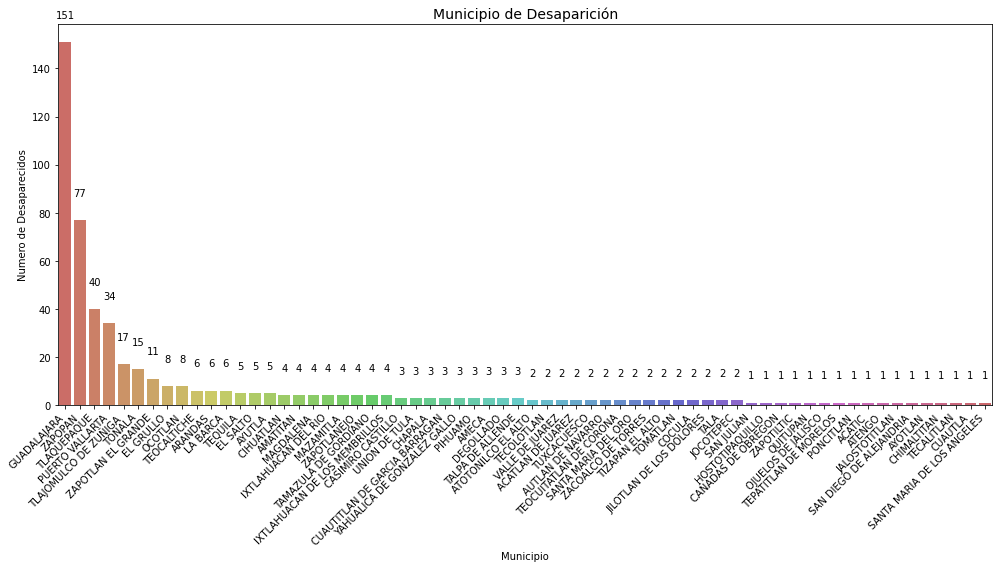

In [22]:
grafica_df=jalisco_df.head(500)

plt.figure(figsize=(14, 8))
ax = sns.countplot( x = 'Municipio', data = grafica_df, palette = "hls", order = grafica_df['Municipio'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Municipio de Desaparición',fontsize= 14)
plt.ylabel('Numero de Desaparecidos')

# calculate passengers for each category
labels = (grafica_df['Municipio'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

## Se analiza el género de los desaparecidos en Jalisco

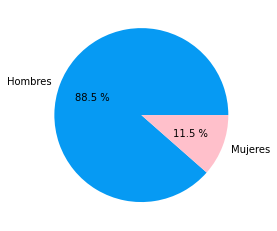

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [23]:
mylabels = ["Hombres", "Mujeres"]
colors = ['#069af3','#ffc0cb']
plt.pie(jalisco_df["Sexo"].value_counts(), labels=mylabels ,colors=colors,autopct='%0.1f %%')
plt.show() 
plt.figure(figsize=(14,10))

## Se analizan las edades de los desaparecidos en Jalisco

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


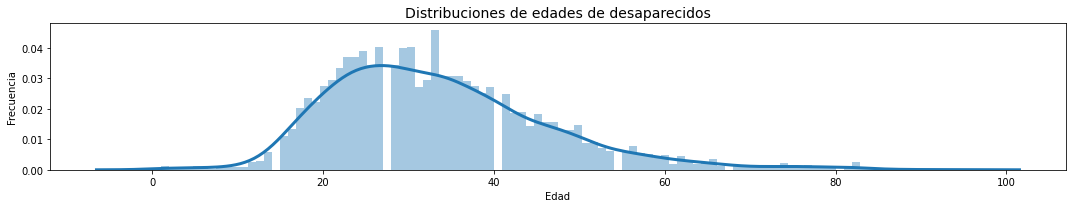

In [24]:
#Cuántos hay de cada edad a partir de los 0 años
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(jalisco_df[(jalisco_df["Edad"] > 0)].Edad, kde_kws={"lw": 3}, bins = 100)

# set titles and labels
plt.title('Distribuciones de edades de desaparecidos',fontsize= 14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

In [25]:
age_distr=pd.DataFrame(jalisco_df["Edad"].describe())
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Edad,3362.0,33.528846,12.726487,1.0,24.0,32.0,40.0,94.0


## Se analizan las alturas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


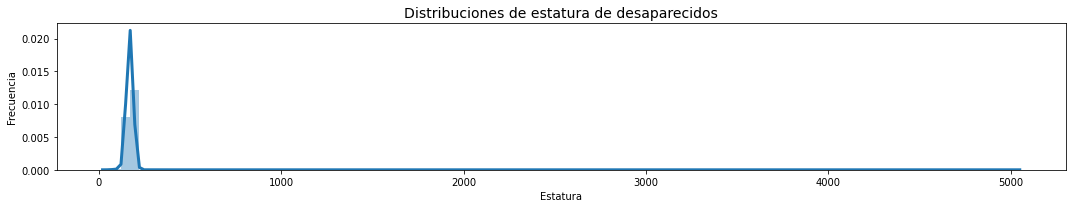

In [26]:
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(jalisco_df[(jalisco_df["Estatura"] > 0)].Estatura, kde_kws={"lw": 3}, bins = 100)

# set titles and labels
plt.title('Distribuciones de estatura de desaparecidos',fontsize= 14)
plt.xlabel('Estatura')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

In [27]:
height_distr=pd.DataFrame(jalisco_df["Estatura"].describe())
height_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Estatura,3362.0,170.508244,83.899779,70.0,165.0,170.0,175.0,5000.0


In [28]:
jalisco_df[jalisco_df["Estatura"]==70]=170
jalisco_df[jalisco_df["Estatura"]==80]=180
jalisco_df[jalisco_df["Estatura"]==95]=195
jalisco_df[jalisco_df["Estatura"]==5000]=jalisco_df["Estatura"].mean()

In [29]:
height_distr=pd.DataFrame(jalisco_df["Estatura"].describe())
height_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Estatura,3362.0,169.190762,9.37543,100.0,165.0,170.0,175.0,200.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


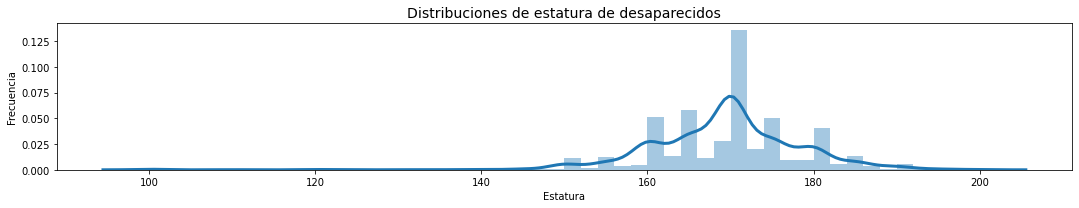

In [30]:
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(jalisco_df[(jalisco_df["Estatura"] > 0)].Estatura, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distribuciones de estatura de desaparecidos',fontsize= 14)
plt.xlabel('Estatura')
plt.ylabel('Frecuencia')
# clean layout
plt.tight_layout()

## Se analizan las nacionalidades

In [31]:
jalisco_df['Nacionalidad'].value_counts()

MEXICANA              3332
ESTADOUNIDENSE           8
COLOMBIANA               3
ITALIANA                 3
CANADIENSE               2
170                      2
CUBANA                   1
ESPAÑOLA                 1
GUATEMALTECO             1
180                      1
195                      1
HONDUREÑA                1
VENEZOLANA               1
SALVADOREÑA              1
170.62722029984113       1
Name: Nacionalidad, dtype: int64

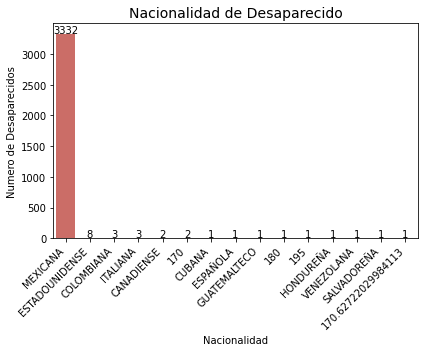

In [32]:
import math

plt.figure(figsize=(6, 5))
ax = sns.countplot( x = 'Nacionalidad', data = jalisco_df, palette = "hls", order = jalisco_df['Nacionalidad'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Nacionalidad de Desaparecido',fontsize= 14)
plt.ylabel('Numero de Desaparecidos')

# calculate passengers for each category
labels = (jalisco_df['Nacionalidad'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

In [33]:
#¿Los extranjeros solamente desaparecen en los cinco principales destinos 
#turísticos de Jalisco (Chapala, Cihuatlán,Guadalajara,Puerto Vallarta y San Juan de los Lagos)?
extranjeros = jalisco_df[(jalisco_df['Nacionalidad'] != 'MEXICANA') & 
                               ((jalisco_df['Municipio'] == 'PUERTO VALLARTA') | 
                               (jalisco_df['Municipio'] == 'GUADALAJARA') | 
                               (jalisco_df['Municipio'] == 'CHAPALA') |
                               (jalisco_df['Municipio'] == 'SAN JUAN DE LOS LAGOS')|
                               (jalisco_df['Municipio'] == 'CIHUATLAN'))]
extranjeros

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
4724,GUADALAJARA,NaN,185.000000,DELGADA,HOMBRE,79.000000,NaN,FGE - JALISCO,2011-09-01 12:00:00,75-79,1.0,9.0,2011.0
4735,GUADALAJARA,CUBANA,162.000000,DELGADA,MUJER,22.000000,NaN,FGE - JALISCO,2010-11-29 12:00:00,20-24,29.0,11.0,2010.0
4826,CHAPALA,ESTADOUNIDENSE,175.000000,ROBUSTA,HOMBRE,68.000000,NaN,FGE - JALISCO,2011-09-09 07:00:00,65-69,9.0,9.0,2011.0
6919,PUERTO VALLARTA,NaN,170.508244,NaN,MUJER,33.528846,NaN,FGE - JALISCO,2011-03-23 07:30:00,30-34,23.0,3.0,2011.0
12035,PUERTO VALLARTA,ESTADOUNIDENSE,170.000000,DELGADA,HOMBRE,33.000000,NaN,FGE - JALISCO,2013-05-08 05:00:00,30-34,8.0,5.0,2013.0
12036,PUERTO VALLARTA,CANADIENSE,175.000000,DELGADA,HOMBRE,22.000000,TATUAJES EN AMBAS MANOS Y CUELLOS.,FGE - JALISCO,2013-05-08 05:00:00,20-24,8.0,5.0,2013.0
23725,GUADALAJARA,NaN,170.508244,NaN,MUJER,27.000000,NaN,PGJ - GUANAJUATO,2013-02-06 07:00:00,25-29,6.0,2.0,2013.0
24219,PUERTO VALLARTA,CANADIENSE,170.508244,DELGADA,HOMBRE,34.000000,NaN,FGE - JALISCO,2016-03-16 04:00:00,30-34,16.0,3.0,2016.0
24258,GUADALAJARA,ESTADOUNIDENSE,158.000000,DELGADA,HOMBRE,31.000000,CICATRIZ EN EL CUELLO HORIZONTAL DEL LADO IZQU...,FGE - JALISCO,2016-03-21 12:00:00,30-34,21.0,3.0,2016.0
29595,GUADALAJARA,VENEZOLANA,150.000000,DELGADA,MUJER,29.000000,NaN,FGE - JALISCO,2017-02-06 02:10:00,25-29,6.0,2.0,2017.0


## Se analiza la cantidad de mexicanos que desaparecen en zonas turísticas

In [34]:
mexicanos=jalisco_df[(jalisco_df['Nacionalidad'] == 'MEXICANA') & 
                 ((jalisco_df['Municipio'] == 'PUERTO VALLARTA') | 
                  (jalisco_df['Municipio'] == 'GUADALAJARA') | 
                  (jalisco_df['Municipio'] == 'CHAPALA') |
                  (jalisco_df['Municipio'] == 'SAN JUAN DE LOS LAGOS')|
                  (jalisco_df['Municipio'] == 'CIHUATLAN'))]
mexicanos

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
1416,GUADALAJARA,MEXICANA,170.0,ROBUSTA,HOMBRE,23.0,NaN,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0
4279,CHAPALA,MEXICANA,180.0,DELGADA,HOMBRE,36.0,"TATUAJES QUE DICEN: LOPEZ, UNA VIRGEN Y UNO QU...",FGE - JALISCO,2012-02-06 08:00:00,35-39,6.0,2.0,2012.0
4304,GUADALAJARA,MEXICANA,170.0,DELGADA,HOMBRE,28.0,"BRAZO TATUADOS IZQUIERDO TRES ESTRELLAS, EL DE...",FGE - JALISCO,2012-10-14 01:00:00,25-29,14.0,10.0,2012.0
4309,GUADALAJARA,MEXICANA,165.0,ROBUSTA,HOMBRE,45.0,UN TATUAJE DEL SAGRADO CORAZON DE JESUS EN EL ...,FGE - JALISCO,2012-10-26 01:00:00,40-54,26.0,10.0,2012.0
4314,PUERTO VALLARTA,MEXICANA,185.0,DELGADA,HOMBRE,26.0,TIENE UN DIENTE ESTRELLADO EN EL MAXILAR SUPERIOR,FGE - JALISCO,2010-08-21 07:30:00,25-29,21.0,8.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36014,GUADALAJARA,MEXICANA,175.0,DELGADA,HOMBRE,29.0,PRESENTA CICATRICES EN CEJA IZQUIERDA DEL LADO...,FGE - JALISCO,2017-06-13 02:00:00,25-29,13.0,6.0,2017.0
36038,GUADALAJARA,MEXICANA,170.0,DELGADA,HOMBRE,22.0,"CICATRIZ EN LA BARBILLA DERECHA, TIENE VARIOS ...",FGE - JALISCO,2017-07-31 08:00:00,20-24,31.0,7.0,2017.0
36067,GUADALAJARA,MEXICANA,165.0,MEDIANA,MUJER,13.0,NaN,FGE - JALISCO,2017-09-30 12:00:00,10-14,30.0,9.0,2017.0
36069,GUADALAJARA,MEXICANA,140.0,DELGADA,MUJER,20.0,LUNAR EN LA BOCA DEL LADO DERECHO,FGE - JALISCO,2017-10-02 09:30:00,20-24,2.0,10.0,2017.0


In [35]:
pd.concat([extranjeros,mexicanos],axis=0)

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año
4724,GUADALAJARA,NaN,185.000000,DELGADA,HOMBRE,79.000000,NaN,FGE - JALISCO,2011-09-01 12:00:00,75-79,1.0,9.0,2011.0
4735,GUADALAJARA,CUBANA,162.000000,DELGADA,MUJER,22.000000,NaN,FGE - JALISCO,2010-11-29 12:00:00,20-24,29.0,11.0,2010.0
4826,CHAPALA,ESTADOUNIDENSE,175.000000,ROBUSTA,HOMBRE,68.000000,NaN,FGE - JALISCO,2011-09-09 07:00:00,65-69,9.0,9.0,2011.0
6919,PUERTO VALLARTA,NaN,170.508244,NaN,MUJER,33.528846,NaN,FGE - JALISCO,2011-03-23 07:30:00,30-34,23.0,3.0,2011.0
12035,PUERTO VALLARTA,ESTADOUNIDENSE,170.000000,DELGADA,HOMBRE,33.000000,NaN,FGE - JALISCO,2013-05-08 05:00:00,30-34,8.0,5.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36014,GUADALAJARA,MEXICANA,175.000000,DELGADA,HOMBRE,29.000000,PRESENTA CICATRICES EN CEJA IZQUIERDA DEL LADO...,FGE - JALISCO,2017-06-13 02:00:00,25-29,13.0,6.0,2017.0
36038,GUADALAJARA,MEXICANA,170.000000,DELGADA,HOMBRE,22.000000,"CICATRIZ EN LA BARBILLA DERECHA, TIENE VARIOS ...",FGE - JALISCO,2017-07-31 08:00:00,20-24,31.0,7.0,2017.0
36067,GUADALAJARA,MEXICANA,165.000000,MEDIANA,MUJER,13.000000,NaN,FGE - JALISCO,2017-09-30 12:00:00,10-14,30.0,9.0,2017.0
36069,GUADALAJARA,MEXICANA,140.000000,DELGADA,MUJER,20.000000,LUNAR EN LA BOCA DEL LADO DERECHO,FGE - JALISCO,2017-10-02 09:30:00,20-24,2.0,10.0,2017.0


In [36]:
(len(pd.concat([extranjeros,mexicanos],axis=0))/len(jalisco_df))*100

25.81796549672814

## Se analiza las senas particulares

In [37]:
jalisco_df["Descripcion de senas particulares"]=jalisco_df["Descripcion de senas particulares"].fillna("")

#Tatuaje de la Santa Muerte
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Santa Muerte", na=False, case=False)), 
                "Santa Muerte"]= 1
jalisco_df["Santa Muerte"]=jalisco_df["Santa Muerte"].fillna(0)

#Tatuaje
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Tatuaje", na=False, case=False)), 
                "Tatuaje"]= 1
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Tatuajes", na=False, case=False)), 
                "Tatuaje"]= 1
jalisco_df["Tatuaje"]=jalisco_df["Tatuaje"].fillna(0)

#Cicatriz
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Cicatriz", na=False, case=False)), 
                "Cicatriz"]= 1
jalisco_df["Cicatriz"]=jalisco_df["Cicatriz"].fillna(0)

#Lunar
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Lunar", na=False, case=False)), 
                "Lunares"]= 1
jalisco_df.loc[(jalisco_df["Descripcion de senas particulares"].str.contains("Lunares", na=False, case=False)), 
                "Lunares"]= 1
jalisco_df["Lunares"]=jalisco_df["Lunares"].fillna(0)

jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Descripcion de senas particulares,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año,Santa Muerte,Tatuaje,Cicatriz,Lunares
523,ZAPOPAN,MEXICANA,165.0,DELGADA,HOMBRE,21.0,CICATRIZ EN LA FRENTE Y LE FALTA UN DIENTE,FGE - DURANGO,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0,0.0,0.0,1.0,0.0
1416,GUADALAJARA,MEXICANA,170.0,ROBUSTA,HOMBRE,23.0,,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0,0.0,0.0,0.0,0.0
4276,VALLE DE JUAREZ,MEXICANA,180.0,ROBUSTA,HOMBRE,25.0,TATUAJES EN UN BRAZO DICE OROZCO Y EL OTRO VEG...,FGE - JALISCO,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0,1.0,1.0,0.0,0.0
4277,MAZAMITLA,MEXICANA,171.0,DELGADA,HOMBRE,27.0,LABIO LEPORINO SUPERIOR.,FGE - JALISCO,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0,0.0,0.0,0.0,0.0
4278,MAZAMITLA,MEXICANA,175.0,DELGADA,HOMBRE,28.0,CICATRIZ EN FORMA DE ALACRAN EN BRAZO IZQUIERDO.,FGE - JALISCO,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,175.0,MEDIANA,HOMBRE,39.0,TIENE UN LUNAR ABULTADO EN LA ESPALDA Y UNO EN...,FGE - JALISCO,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0,0.0,1.0,0.0,1.0
36192,ZAPOPAN,MEXICANA,165.0,ROBUSTA,HOMBRE,24.0,"TIENE UNA CICATRIZ EN LA PANTORRILLA DERECHA, ...",FGE - JALISCO,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0,0.0,1.0,1.0,0.0
36239,ARANDAS,MEXICANA,165.0,DELGADA,HOMBRE,32.0,TIENE UN MECHON DE CANAS EN LA PARTE FRONTAL D...,FGE - JALISCO,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0,0.0,1.0,1.0,0.0
36240,TEPATITLAN DE MORELOS,MEXICANA,175.0,MEDIANA,HOMBRE,48.0,,FGE - JALISCO,2017-09-23 05:00:00,40-54,23.0,9.0,2017.0,0.0,0.0,0.0,0.0


In [38]:
jalisco_df=jalisco_df.drop(['Descripcion de senas particulares'], axis=1)

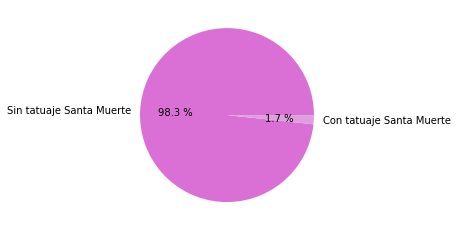

<Figure size 1008x720 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

In [39]:
#Tatuaje de la Santa Muerte
mylabels = ["Sin tatuaje Santa Muerte", "Con tatuaje Santa Muerte"]
colors = ['#da70d6','#dda0dd']
plt.pie(jalisco_df["Santa Muerte"].value_counts(), labels=mylabels ,colors=colors,autopct='%0.1f %%')
plt.show() 
plt.figure(figsize=(14,10))

# Preparación del conjunto de datos para agrupamiento

In [40]:
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año,Santa Muerte,Tatuaje,Cicatriz,Lunares
523,ZAPOPAN,MEXICANA,165.0,DELGADA,HOMBRE,21.0,FGE - DURANGO,2006-01-01 12:00:00,20-24,1.0,1.0,2006.0,0.0,0.0,1.0,0.0
1416,GUADALAJARA,MEXICANA,170.0,ROBUSTA,HOMBRE,23.0,FGE - PUEBLA,2011-07-28 03:00:00,20-24,28.0,7.0,2011.0,0.0,0.0,0.0,0.0
4276,VALLE DE JUAREZ,MEXICANA,180.0,ROBUSTA,HOMBRE,25.0,FGE - JALISCO,2012-08-08 08:00:00,25-29,8.0,8.0,2012.0,1.0,1.0,0.0,0.0
4277,MAZAMITLA,MEXICANA,171.0,DELGADA,HOMBRE,27.0,FGE - JALISCO,2012-08-07 10:30:00,25-29,7.0,8.0,2012.0,0.0,0.0,0.0,0.0
4278,MAZAMITLA,MEXICANA,175.0,DELGADA,HOMBRE,28.0,FGE - JALISCO,2012-08-07 09:00:00,25-29,7.0,8.0,2012.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,TONALA,MEXICANA,175.0,MEDIANA,HOMBRE,39.0,FGE - JALISCO,2017-08-10 09:00:00,35-39,10.0,8.0,2017.0,0.0,1.0,0.0,1.0
36192,ZAPOPAN,MEXICANA,165.0,ROBUSTA,HOMBRE,24.0,FGE - JALISCO,2017-09-25 09:30:00,20-24,25.0,9.0,2017.0,0.0,1.0,1.0,0.0
36239,ARANDAS,MEXICANA,165.0,DELGADA,HOMBRE,32.0,FGE - JALISCO,2017-11-17 11:00:00,30-34,17.0,11.0,2017.0,0.0,1.0,1.0,0.0
36240,TEPATITLAN DE MORELOS,MEXICANA,175.0,MEDIANA,HOMBRE,48.0,FGE - JALISCO,2017-09-23 05:00:00,40-54,23.0,9.0,2017.0,0.0,0.0,0.0,0.0


In [41]:
jalisco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3362 entries, 523 to 36243
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Municipio                             3362 non-null   object 
 1   Nacionalidad                          3359 non-null   object 
 2   Estatura                              3362 non-null   float64
 3   Complexion                            3220 non-null   object 
 4   Sexo                                  3362 non-null   object 
 5   Edad                                  3362 non-null   float64
 6   Dependencia que envio la informacion  3362 non-null   object 
 7   Fecha_hora                            3361 non-null   object 
 8   Rango de Edad                         3362 non-null   object 
 9   Dia                                   3361 non-null   float64
 10  Mes                                   3361 non-null   float64
 11  Año           

In [42]:
encoder = LabelEncoder()

jalisco_df["Municipio"] = jalisco_df["Municipio"].astype(str)
jalisco_df["Nacionalidad"] = jalisco_df["Nacionalidad"].astype(str)
jalisco_df["Rango de Edad"] = jalisco_df["Rango de Edad"].astype(str)

jalisco_df['Municipio'] = encoder.fit_transform(jalisco_df['Municipio'])
jalisco_df['Nacionalidad'] = encoder.fit_transform(jalisco_df['Nacionalidad'])
jalisco_df['Rango de Edad'] = encoder.fit_transform(jalisco_df['Rango de Edad'])
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Edad,Dependencia que envio la informacion,Fecha_hora,Rango de Edad,Dia,Mes,Año,Santa Muerte,Tatuaje,Cicatriz,Lunares
523,114,12,165.0,DELGADA,HOMBRE,21.0,FGE - DURANGO,2006-01-01 12:00:00,7,1.0,1.0,2006.0,0.0,0.0,1.0,0.0
1416,38,12,170.0,ROBUSTA,HOMBRE,23.0,FGE - PUEBLA,2011-07-28 03:00:00,7,28.0,7.0,2011.0,0.0,0.0,0.0,0.0
4276,107,12,180.0,ROBUSTA,HOMBRE,25.0,FGE - JALISCO,2012-08-08 08:00:00,8,8.0,8.0,2012.0,1.0,1.0,0.0,0.0
4277,56,12,171.0,DELGADA,HOMBRE,27.0,FGE - JALISCO,2012-08-07 10:30:00,8,7.0,8.0,2012.0,0.0,0.0,0.0,0.0
4278,56,12,175.0,DELGADA,HOMBRE,28.0,FGE - JALISCO,2012-08-07 09:00:00,8,7.0,8.0,2012.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36187,97,12,175.0,MEDIANA,HOMBRE,39.0,FGE - JALISCO,2017-08-10 09:00:00,10,10.0,8.0,2017.0,0.0,1.0,0.0,1.0
36192,114,12,165.0,ROBUSTA,HOMBRE,24.0,FGE - JALISCO,2017-09-25 09:30:00,7,25.0,9.0,2017.0,0.0,1.0,1.0,0.0
36239,9,12,165.0,DELGADA,HOMBRE,32.0,FGE - JALISCO,2017-11-17 11:00:00,9,17.0,11.0,2017.0,0.0,1.0,1.0,0.0
36240,89,12,175.0,MEDIANA,HOMBRE,48.0,FGE - JALISCO,2017-09-23 05:00:00,11,23.0,9.0,2017.0,0.0,0.0,0.0,0.0


In [43]:
jalisco_df=jalisco_df.drop(['Edad'], axis=1)
jalisco_df=jalisco_df.drop(['Dependencia que envio la informacion'], axis=1)
jalisco_df=jalisco_df.drop(['Fecha_hora'], axis=1)
jalisco_df=jalisco_df.drop(['Año'], axis=1)

In [44]:
#Sexo
jalisco_df.loc[(jalisco_df["Sexo"].str.contains("MUJER", na=False, case=False)), 
                "Sexo"]= 1
jalisco_df.loc[(jalisco_df["Sexo"].str.contains("HOMBRE", na=False, case=False)), 
                "Sexo"]= 2

In [45]:
jalisco_df["Sexo"]=jalisco_df["Sexo"].fillna(0)

In [46]:
#Complexion
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("DELGADA", na=False, case=False)), 
                "Complexion"]= 1
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("ROBUSTA", na=False, case=False)), 
                "Complexion"]= 2
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("MEDIANA", na=False, case=False)), 
                "Complexion"]= 3
jalisco_df.loc[(jalisco_df["Complexion"].str.contains("OBESA", na=False,case=False)), 
                "Complexion"]= 4

jalisco_df["Complexion"]=jalisco_df["Complexion"].fillna(0)

In [47]:
jalisco_df

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Rango de Edad,Dia,Mes,Santa Muerte,Tatuaje,Cicatriz,Lunares
523,114,12,165.0,1.0,2.0,7,1.0,1.0,0.0,0.0,1.0,0.0
1416,38,12,170.0,2.0,2.0,7,28.0,7.0,0.0,0.0,0.0,0.0
4276,107,12,180.0,2.0,2.0,8,8.0,8.0,1.0,1.0,0.0,0.0
4277,56,12,171.0,1.0,2.0,8,7.0,8.0,0.0,0.0,0.0,0.0
4278,56,12,175.0,1.0,2.0,8,7.0,8.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
36187,97,12,175.0,3.0,2.0,10,10.0,8.0,0.0,1.0,0.0,1.0
36192,114,12,165.0,2.0,2.0,7,25.0,9.0,0.0,1.0,1.0,0.0
36239,9,12,165.0,1.0,2.0,9,17.0,11.0,0.0,1.0,1.0,0.0
36240,89,12,175.0,3.0,2.0,11,23.0,9.0,0.0,0.0,0.0,0.0


In [48]:
data_clust = jalisco_df
data_clust['Dia']=data_clust['Dia'].fillna(0)
data_clust['Mes']=data_clust['Mes'].fillna(0)
data_clust.isna().sum()

Municipio        0
Nacionalidad     0
Estatura         0
Complexion       0
Sexo             0
Rango de Edad    0
Dia              0
Mes              0
Santa Muerte     0
Tatuaje          0
Cicatriz         0
Lunares          0
dtype: int64

# Agrupamiento

##Se realiza el método del codo para encontrar el número de clusters ideal para realizar el agrupamiento

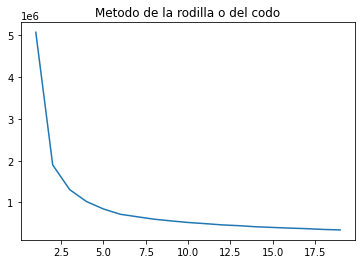

In [49]:
wcss = []

for i in range(1,20):
  kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300,
                  n_init = 10, random_state = 2022)
  kmeans.fit(data_clust)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,20), wcss)
plt.title("Metodo de la rodilla o del codo")
#plt.xlabel("Numero de grupos (k)")
#plt.ylabel("WCSS")
plt.show()

In [50]:
kl = KneeLocator(range(1,20), wcss, curve="convex", direction="decreasing")
print("Elbow: ", kl.elbow)

Elbow:  4


In [51]:
kmeans = KMeans(n_clusters=4,init="k-means++", max_iter=300,
                n_init=10,random_state=2022)
y_kmeans = kmeans.fit(data_clust)
print(kmeans.cluster_centers_)

[[6.19536622e+01 1.19521674e+01 1.69151563e+02 1.62630792e+00
  1.89536622e+00 8.76083707e+00 1.49985052e+01 6.23617339e+00
  1.34529148e-02 3.51270553e-01 2.85500747e-01 1.00149477e-01]
 [1.02607947e+02 1.19754967e+01 1.69239195e+02 1.59470199e+00
  1.88675497e+00 8.59337748e+00 1.53536424e+01 6.57284768e+00
  2.25165563e-02 3.38410596e-01 3.09933775e-01 1.27814570e-01]
 [3.09159593e+01 1.19940577e+01 1.69117262e+02 1.58488964e+00
  1.87775891e+00 8.89049236e+00 1.54541596e+01 6.37096774e+00
  1.18845501e-02 2.73344652e-01 2.75042445e-01 1.09507640e-01]
 [1.20000000e+00 1.20000000e+00 1.77125444e+02 1.77125444e+02
  1.77125444e+02 4.20000000e+00 1.77125444e+02 1.77125444e+02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]


#Se analizan las características que tiene en común cada grupo

###Se analizan las características del grupo 0

In [52]:
data_clust["labels"] = kmeans.labels_
data_clust.groupby("labels").get_group(0)

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Rango de Edad,Dia,Mes,Santa Muerte,Tatuaje,Cicatriz,Lunares,labels
4277,56,12,171.000000,1.0,2.0,8,7.0,8.0,0.0,0.0,0.0,0.0,0
4278,56,12,175.000000,1.0,2.0,8,7.0,8.0,0.0,0.0,1.0,0.0,0
4280,77,12,168.000000,1.0,2.0,8,10.0,7.0,0.0,0.0,1.0,0.0,0
4281,77,12,166.000000,1.0,2.0,11,10.0,7.0,0.0,0.0,1.0,0.0,0
4282,81,12,170.000000,1.0,2.0,7,14.0,6.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35743,66,12,180.000000,3.0,2.0,11,26.0,11.0,0.0,0.0,0.0,1.0,0
35809,63,12,196.000000,2.0,2.0,10,11.0,9.0,0.0,0.0,0.0,0.0,0
35817,50,12,170.508244,3.0,2.0,11,9.0,2.0,0.0,0.0,1.0,0.0,0
35910,79,12,165.000000,1.0,2.0,10,15.0,7.0,0.0,0.0,1.0,1.0,0


In [53]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Municipio'].value_counts()
print(grupo_0['Municipio'].value_counts().to_string())

63    154
53     99
50     61
79     56
59     45
51     43
74     20
66     19
81     16
47     13
78     12
62     12
56     12
54     11
61     11
82     11
68      9
80      8
77      7
64      6
75      5
55      4
73      4
49      4
70      4
69      3
65      3
58      3
72      3
60      2
76      2
52      2
67      2
71      1
48      1
57      1


In [54]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Nacionalidad'].value_counts()
print(grupo_0['Nacionalidad'].value_counts().to_string())

12    662
8       3
4       2
5       1
15      1


In [55]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Estatura'].value_counts()
print(grupo_0['Estatura'].value_counts().to_string())

170.000000    158
165.000000     79
160.000000     70
175.000000     54
180.000000     50
170.508244     48
168.000000     32
172.000000     23
167.000000     14
162.000000     11
155.000000     10
158.000000     10
150.000000     10
185.000000     10
173.000000     10
176.000000      9
174.000000      8
178.000000      7
163.000000      6
190.000000      6
166.000000      5
169.000000      5
187.000000      4
154.000000      3
164.000000      3
171.000000      3
182.000000      3
153.000000      2
156.000000      2
200.000000      2
184.000000      1
100.000000      1
140.000000      1
145.000000      1
148.000000      1
179.000000      1
135.000000      1
198.000000      1
183.000000      1
177.000000      1
192.000000      1
196.000000      1


In [56]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Complexion'].value_counts()
print(grupo_0['Complexion'].value_counts().to_string())

1.0    340
2.0    152
3.0    140
0.0     31
4.0      6


In [57]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Sexo'].value_counts()
print(grupo_0['Sexo'].value_counts().to_string())

2.0    599
1.0     70


In [58]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Rango de Edad'].value_counts()
print(grupo_0['Rango de Edad'].value_counts().to_string())

8     134
11    132
7     107
9     104
10     99
2      50
13     15
14      9
15      8
18      5
1       3
0       1
16      1
12      1


In [59]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Dia'].value_counts()
print(grupo_0['Dia'].value_counts().to_string())

1.0     34
10.0    32
23.0    32
15.0    29
13.0    29
8.0     28
17.0    26
4.0     26
5.0     25
21.0    23
14.0    22
9.0     21
24.0    21
26.0    21
16.0    21
25.0    21
12.0    20
28.0    20
29.0    20
6.0     19
2.0     19
7.0     19
30.0    19
22.0    18
11.0    18
3.0     18
20.0    17
19.0    15
18.0    15
27.0    13
31.0     7
0.0      1


In [60]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Mes'].value_counts()
print(grupo_0['Mes'].value_counts().to_string())

1.0     66
8.0     64
4.0     61
6.0     59
2.0     59
12.0    56
5.0     56
7.0     54
3.0     53
9.0     53
10.0    45
11.0    42
0.0      1


In [61]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Santa Muerte'].value_counts()
print(grupo_0['Santa Muerte'].value_counts().to_string())

0.0    660
1.0      9


In [62]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Tatuaje'].value_counts()
print(grupo_0['Tatuaje'].value_counts().to_string())

0.0    434
1.0    235


In [63]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Cicatriz'].value_counts()
print(grupo_0['Cicatriz'].value_counts().to_string())

0.0    478
1.0    191


In [64]:
grupo_0=jalisco_df[jalisco_df['labels']==0]
grupo_0['Lunares'].value_counts()
print(grupo_0['Lunares'].value_counts().to_string())

0.0    602
1.0     67


###Se analizan las características del grupo 1

In [65]:
data_clust["labels"] = kmeans.labels_
data_clust.groupby("labels").get_group(1)

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Rango de Edad,Dia,Mes,Santa Muerte,Tatuaje,Cicatriz,Lunares,labels
523,114,12,165.0,1.0,2.0,7,1.0,1.0,0.0,0.0,1.0,0.0,1
4276,107,12,180.0,2.0,2.0,8,8.0,8.0,1.0,1.0,0.0,0.0,1
4286,83,12,170.0,1.0,2.0,2,29.0,3.0,0.0,0.0,0.0,0.0,1
4289,107,12,180.0,1.0,2.0,11,5.0,3.0,1.0,1.0,0.0,0.0,1
4302,118,12,160.0,3.0,2.0,10,28.0,11.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36159,93,12,165.0,1.0,2.0,9,4.0,8.0,1.0,1.0,0.0,1.0,1
36187,97,12,175.0,3.0,2.0,10,10.0,8.0,0.0,1.0,0.0,1.0,1
36192,114,12,165.0,2.0,2.0,7,25.0,9.0,0.0,1.0,1.0,0.0,1
36240,89,12,175.0,3.0,2.0,11,23.0,9.0,0.0,0.0,0.0,0.0,1


In [66]:
grupo_1=jalisco_df[jalisco_df['labels']==1]
grupo_1['Municipio'].value_counts()
print(grupo_1['Municipio'].value_counts().to_string())

114    529
94     257
93     210
97     153
89      90
117     37
118     30
101     21
90      18
92      15
83      13
115     12
112     11
105     11
113     10
85      10
96       9
87       8
107      8
108      5
104      5
103      5
100      5
109      5
86       5
102      5
111      4
91       3
106      3
95       3
98       2
88       2
84       2
116      2
99       1
110      1


In [67]:
grupo_1['Nacionalidad'].value_counts()
print(grupo_1['Nacionalidad'].value_counts().to_string())

12    1499
8        3
5        2
11       2
7        1
9        1
10       1
13       1


In [68]:
grupo_1['Estatura'].value_counts()
print(grupo_1['Estatura'].value_counts().to_string())

170.000000    295
165.000000    148
160.000000    147
175.000000    143
180.000000    119
170.508244     83
168.000000     64
185.000000     47
150.000000     43
155.000000     40
172.000000     39
162.000000     36
167.000000     32
178.000000     31
173.000000     22
176.000000     21
190.000000     21
163.000000     18
174.000000     16
169.000000     15
183.000000     11
158.000000      9
177.000000      9
182.000000      8
164.000000      8
166.000000      8
156.000000      7
186.000000      6
187.000000      6
100.000000      6
157.000000      6
145.000000      6
179.000000      5
171.000000      4
120.000000      3
152.000000      3
193.000000      3
195.000000      3
181.000000      3
192.000000      2
130.000000      2
184.000000      2
153.000000      2
188.000000      2
154.000000      2
198.000000      1
159.000000      1
146.000000      1
147.000000      1


In [69]:
grupo_1['Complexion'].value_counts()
print(grupo_1['Complexion'].value_counts().to_string())

1.0    834
2.0    355
3.0    268
0.0     38
4.0     15


In [70]:
grupo_1['Sexo'].value_counts()
print(grupo_1['Sexo'].value_counts().to_string())

2.0    1339
1.0     171


In [71]:
grupo_1['Rango de Edad'].value_counts()
print(grupo_1['Rango de Edad'].value_counts().to_string())

11    291
8     268
7     251
9     244
10    197
2     133
13     35
1      24
14     23
17     10
15      9
16      9
18      8
0       4
12      4


In [72]:
grupo_1['Dia'].value_counts()
print(grupo_1['Dia'].value_counts().to_string())

1.0     104
20.0     67
17.0     64
15.0     57
4.0      54
13.0     54
8.0      53
7.0      49
28.0     49
5.0      49
23.0     48
25.0     48
19.0     48
29.0     48
14.0     48
26.0     47
6.0      47
27.0     46
10.0     45
18.0     44
24.0     44
16.0     43
12.0     43
30.0     43
21.0     43
3.0      41
9.0      40
22.0     40
11.0     37
2.0      37
31.0     30


In [73]:
grupo_1['Mes'].value_counts()
print(grupo_1['Mes'].value_counts().to_string())

5.0     184
10.0    148
9.0     138
6.0     137
8.0     133
7.0     125
1.0     122
4.0     122
11.0    120
3.0     100
12.0     93
2.0      88


In [74]:
grupo_1['Santa Muerte'].value_counts()
print(grupo_1['Santa Muerte'].value_counts().to_string())

0.0    1476
1.0      34


In [75]:
grupo_1['Tatuaje'].value_counts()
print(grupo_1['Tatuaje'].value_counts().to_string())

0.0    999
1.0    511


In [76]:
grupo_1['Cicatriz'].value_counts()
print(grupo_1['Cicatriz'].value_counts().to_string())

0.0    1042
1.0     468


In [77]:
grupo_1['Lunares'].value_counts()
print(grupo_1['Lunares'].value_counts().to_string())

0.0    1317
1.0     193


### Se analizan las características del grupo 2

In [81]:
data_clust["labels"] = kmeans.labels_
data_clust.groupby("labels").get_group(2)

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Rango de Edad,Dia,Mes,Santa Muerte,Tatuaje,Cicatriz,Lunares,labels
1416,38,12,170.000000,2.0,2.0,7,28.0,7.0,0.0,0.0,0.0,0.0,2
4279,20,12,180.000000,1.0,2.0,10,6.0,2.0,0.0,1.0,0.0,1.0,2
4285,16,12,150.000000,1.0,2.0,2,7.0,5.0,0.0,0.0,1.0,0.0,2
4287,16,12,170.000000,1.0,2.0,7,9.0,5.0,0.0,1.0,0.0,0.0,2
4288,16,12,170.508244,3.0,2.0,10,28.0,8.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36166,14,12,170.000000,2.0,2.0,10,1.0,2.0,0.0,0.0,1.0,0.0,2
36178,15,12,165.000000,2.0,2.0,9,21.0,9.0,0.0,1.0,0.0,0.0,2
36181,15,12,175.000000,2.0,2.0,8,21.0,9.0,0.0,1.0,0.0,0.0,2
36183,14,12,160.000000,1.0,2.0,2,20.0,12.0,0.0,0.0,0.0,0.0,2


In [82]:
grupo_2=jalisco_df[jalisco_df['labels']==2]
grupo_2['Municipio'].value_counts()
print(grupo_1['Municipio'].value_counts().to_string())

114    529
94     257
93     210
97     153
89      90
117     37
118     30
101     21
90      18
92      15
83      13
115     12
112     11
105     11
113     10
85      10
96       9
87       8
107      8
108      5
104      5
103      5
100      5
109      5
86       5
102      5
111      4
91       3
106      3
95       3
98       2
88       2
84       2
116      2
99       1
110      1


In [83]:
grupo_2['Nacionalidad'].value_counts()
print(grupo_1['Nacionalidad'].value_counts().to_string())

12    1499
8        3
5        2
11       2
7        1
9        1
10       1
13       1


In [84]:
grupo_2['Estatura'].value_counts()
print(grupo_1['Estatura'].value_counts().to_string())

170.000000    295
165.000000    148
160.000000    147
175.000000    143
180.000000    119
170.508244     83
168.000000     64
185.000000     47
150.000000     43
155.000000     40
172.000000     39
162.000000     36
167.000000     32
178.000000     31
173.000000     22
176.000000     21
190.000000     21
163.000000     18
174.000000     16
169.000000     15
183.000000     11
158.000000      9
177.000000      9
182.000000      8
164.000000      8
166.000000      8
156.000000      7
186.000000      6
187.000000      6
100.000000      6
157.000000      6
145.000000      6
179.000000      5
171.000000      4
120.000000      3
152.000000      3
193.000000      3
195.000000      3
181.000000      3
192.000000      2
130.000000      2
184.000000      2
153.000000      2
188.000000      2
154.000000      2
198.000000      1
159.000000      1
146.000000      1
147.000000      1


In [85]:
grupo_2['Complexion'].value_counts()
print(grupo_1['Complexion'].value_counts().to_string())

1.0    834
2.0    355
3.0    268
0.0     38
4.0     15


In [ ]:
grupo_2['Sexo'].value_counts()
print(grupo_1['Sexo'].value_counts().to_string())

In [86]:
grupo_2['Rango de Edad'].value_counts()
print(grupo_1['Rango de Edad'].value_counts().to_string())

11    291
8     268
7     251
9     244
10    197
2     133
13     35
1      24
14     23
17     10
15      9
16      9
18      8
0       4
12      4


In [87]:
grupo_2['Dia'].value_counts()
print(grupo_1['Dia'].value_counts().to_string())

1.0     104
20.0     67
17.0     64
15.0     57
4.0      54
13.0     54
8.0      53
7.0      49
28.0     49
5.0      49
23.0     48
25.0     48
19.0     48
29.0     48
14.0     48
26.0     47
6.0      47
27.0     46
10.0     45
18.0     44
24.0     44
16.0     43
12.0     43
30.0     43
21.0     43
3.0      41
9.0      40
22.0     40
11.0     37
2.0      37
31.0     30


In [88]:
grupo_2['Mes'].value_counts()
print(grupo_1['Mes'].value_counts().to_string())

5.0     184
10.0    148
9.0     138
6.0     137
8.0     133
7.0     125
1.0     122
4.0     122
11.0    120
3.0     100
12.0     93
2.0      88


In [89]:
grupo_2['Santa Muerte'].value_counts()
print(grupo_1['Santa Muerte'].value_counts().to_string())

0.0    1476
1.0      34


In [90]:
grupo_2['Tatuaje'].value_counts()
print(grupo_1['Tatuaje'].value_counts().to_string())

0.0    999
1.0    511


In [91]:
grupo_2['Cicatriz'].value_counts()
print(grupo_1['Cicatriz'].value_counts().to_string())

0.0    1042
1.0     468


In [92]:
grupo_2['Lunares'].value_counts()
print(grupo_1['Lunares'].value_counts().to_string())

0.0    1317
1.0     193


### Se analizan las características del grupo 3

In [93]:
data_clust["labels"] = kmeans.labels_
data_clust.groupby("labels").get_group(3)

,Municipio,Nacionalidad,Estatura,Complexion,Sexo,Rango de Edad,Dia,Mes,Santa Muerte,Tatuaje,Cicatriz,Lunares,labels
12258,2,2,180.00000,180.00000,180.00000,5,180.00000,180.00000,0.0,0.0,0.0,0.0,3
12537,0,0,170.00000,170.00000,170.00000,3,170.00000,170.00000,0.0,0.0,0.0,0.0,3
13508,3,3,195.00000,195.00000,195.00000,6,195.00000,195.00000,0.0,0.0,0.0,0.0,3
13539,0,0,170.00000,170.00000,170.00000,3,170.00000,170.00000,0.0,0.0,0.0,0.0,3
35062,1,1,170.62722,170.62722,170.62722,4,170.62722,170.62722,0.0,0.0,0.0,0.0,3


## Se realiza el agrupamiento

In [78]:
X = StandardScaler().fit_transform(data_clust)
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=["CP1","CP2","CP3"])
principalDf["labels"] = kmeans.labels_
principalDf

,CP1,CP2,CP3,labels
0,-1.005921,0.982142,-0.742861,1
1,0.574476,-1.509719,-0.083272,2
2,-0.336788,1.978191,5.827460,1
3,-0.336733,0.653795,-0.396488,0
4,-0.359946,0.776747,-0.467855,0
...,...,...,...,...
3357,-0.155818,0.856545,-0.115646,1
3358,0.273452,1.462724,0.543954,1
3359,0.342047,-1.672841,1.170981,2
3360,0.391527,0.335244,-0.361720,1


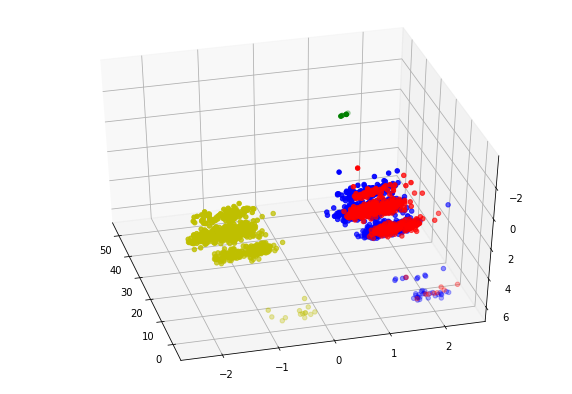

In [79]:
cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]
cluster_3 = principalDf[principalDf["labels"] == 3]

x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]
z_0 = cluster_0["CP3"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]
z_1 = cluster_1["CP3"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]
z_2 = cluster_2["CP3"]

x_3 = cluster_3["CP1"]
y_3 = cluster_3["CP2"]
z_3 = cluster_3["CP3"]

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

 
# Creating plot
ax.scatter3D(x_0, y_0,z_0, c='r', marker='o')
ax.scatter3D(x_1, y_1,z_1, c='b', marker='o')
ax.scatter3D(x_2, y_2,z_2, c='y', marker='o')
ax.scatter3D(x_3, y_3,z_3, c='g', marker='o')

ax.view_init(-140, 15)
plt.show()

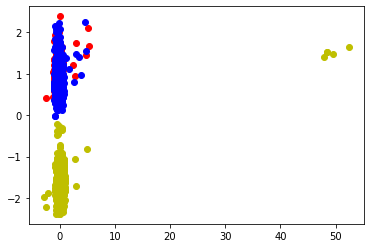

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

cluster_0 = principalDf[principalDf["labels"] == 0]
cluster_1 = principalDf[principalDf["labels"] == 1]
cluster_2 = principalDf[principalDf["labels"] == 2]
cluster_3 = principalDf[principalDf["labels"] == 3]

x_0 = cluster_0["CP1"]
y_0 = cluster_0["CP2"]

x_1 = cluster_1["CP1"]
y_1 = cluster_1["CP2"]

x_2 = cluster_2["CP1"]
y_2 = cluster_2["CP2"]

x_3 = cluster_3["CP1"]
y_3 = cluster_3["CP2"]

ax.scatter(x_0, y_0, c='r', marker='o')
ax.scatter(x_1, y_1, c='b', marker='o')
ax.scatter(x_2, y_2, c='y', marker='o')
ax.scatter(x_3, y_3, c='y', marker='o')

plt.show()